In [2]:
# R code used in Module 2 Regression Diagnostics

# calling libraries

if (!require(Ecdat)) install.packages("Ecdat")
library(Ecdat)

if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

if (!require(ISLR)) install.packages("ISLR")
library(ISLR)

if (!require(GGally)) install.packages("GGally")
library(GGally)

if (!require(car)) install.packages("car")
library(car)

if (!require(scatterplot3d)) install.packages("scatterplot3d")
library(scatterplot3d)

if (!require(tidyverse)) install.packages("tidyverse")
library(tidyverse)

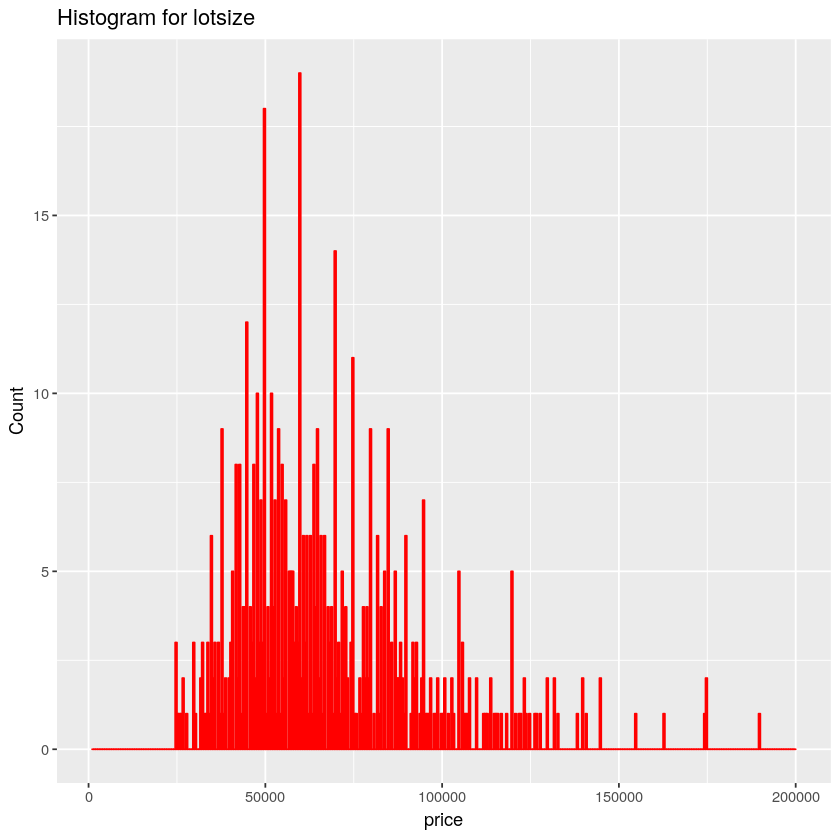

In [3]:
# do a ggplot histogram plot of price with binsize 500

ggplot(data=Housing, aes(Housing$price)) + 
  geom_histogram(breaks=seq(1000, 200000, by =500), 
                 col="red", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for lotsize") +
  labs(x="price", y="Count")

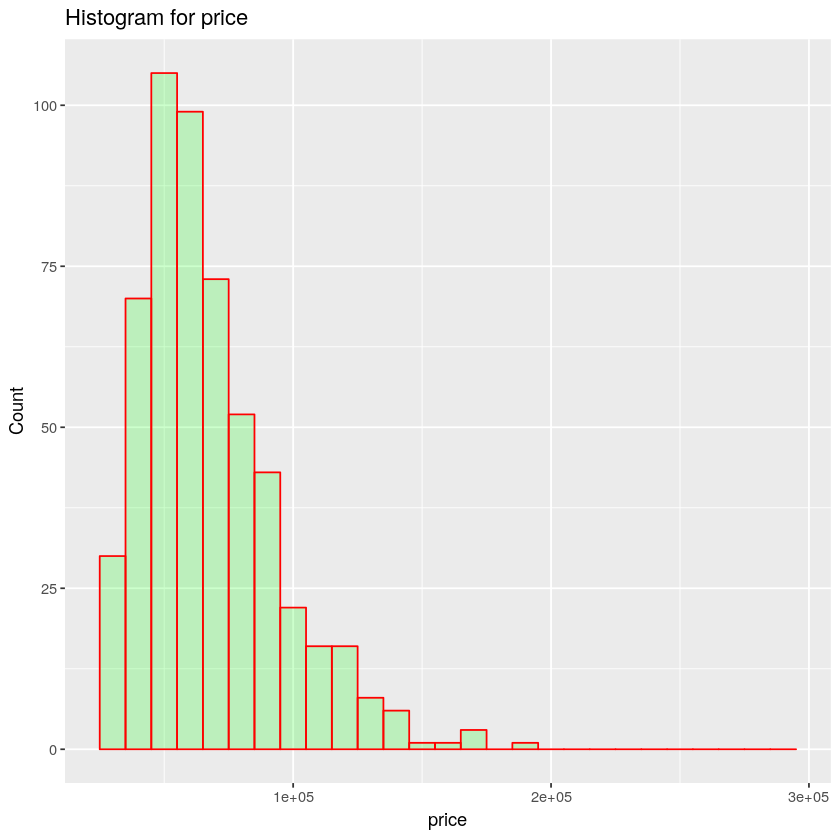

In [4]:
# do a ggplot histogram plot of price with binsize = 10000

ggplot(data=Housing, aes(Housing$price)) + 
  geom_histogram(breaks=seq(25000, 300000, by =10000), 
                 col="red", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for price") +
  labs(x="price", y="Count")


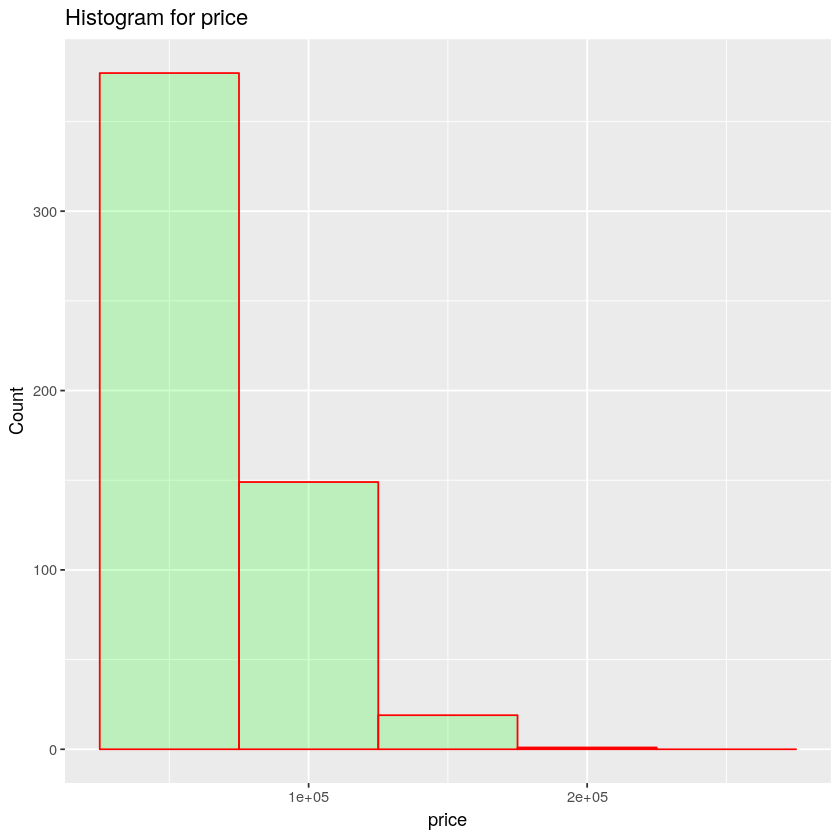

In [5]:
# do a ggplot histogram plot of lotsize with binsize = 50000

ggplot(data=Housing, aes(Housing$price)) + 
  geom_histogram(breaks=seq(25000, 300000, by =50000), 
                 col="red", 
                 fill="green", 
                 alpha = .2) + 
  labs(title="Histogram for price") +
  labs(x="price", y="Count")

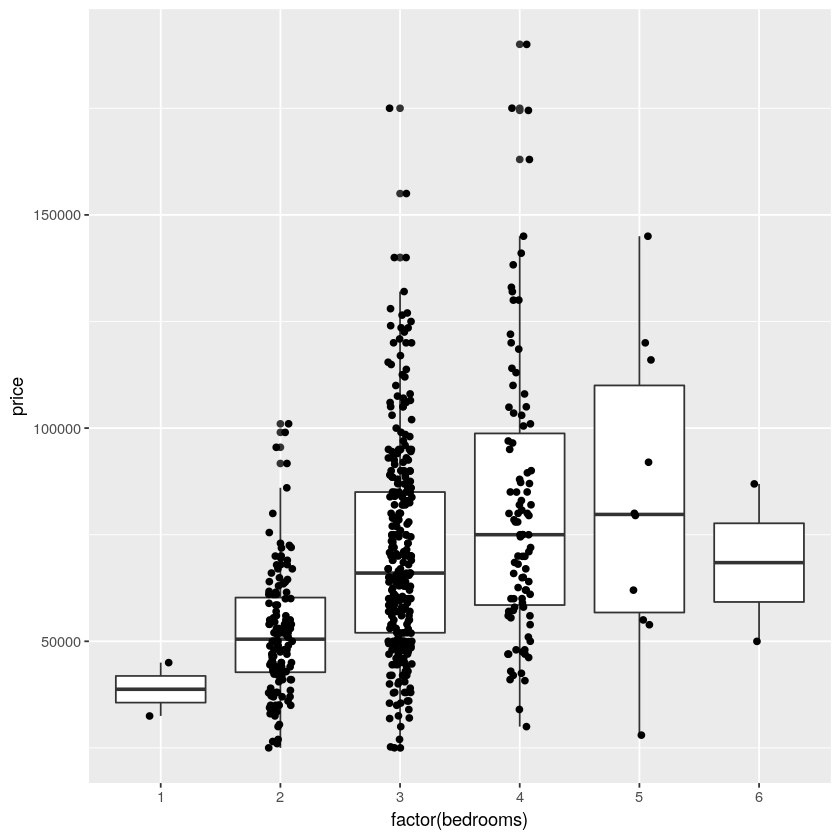

In [6]:
# boxplot 
ggplot(data=Housing, mapping = aes(x = factor(bedrooms), y = price)) + 
    geom_boxplot() + geom_jitter(width = 0.1)


`geom_smooth()` using method = 'loess' and formula 'y ~ x'


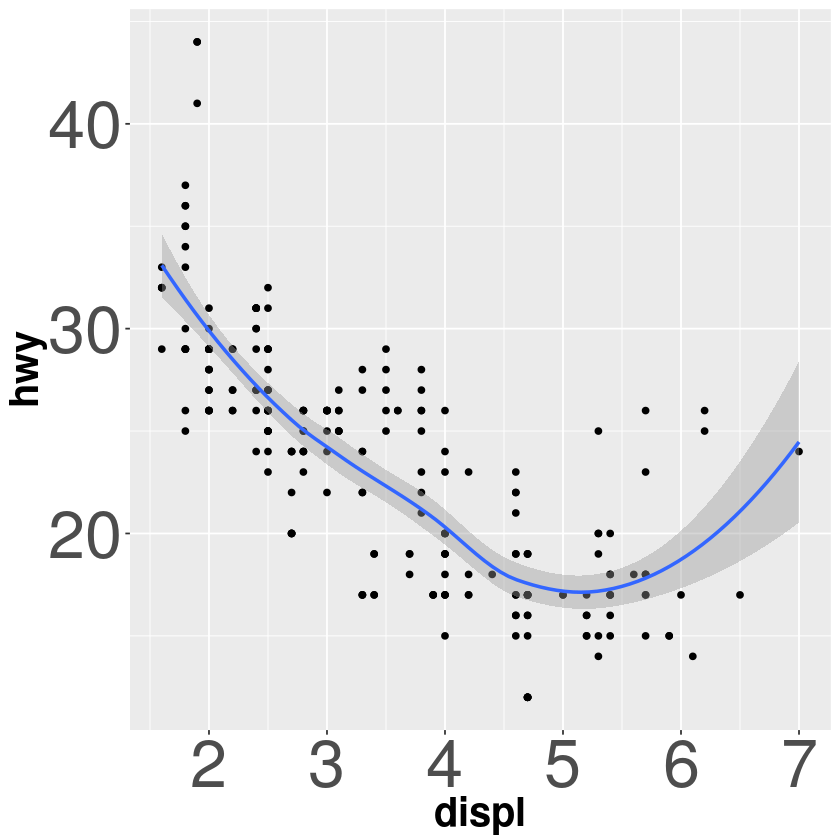

In [7]:
# scatterplot
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy)) + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
        axis.text=element_text(size=40), axis.title=element_text(size=24,face="bold"))

The following objects are masked from trees (pos = 3):

    Girth, Height, Volume



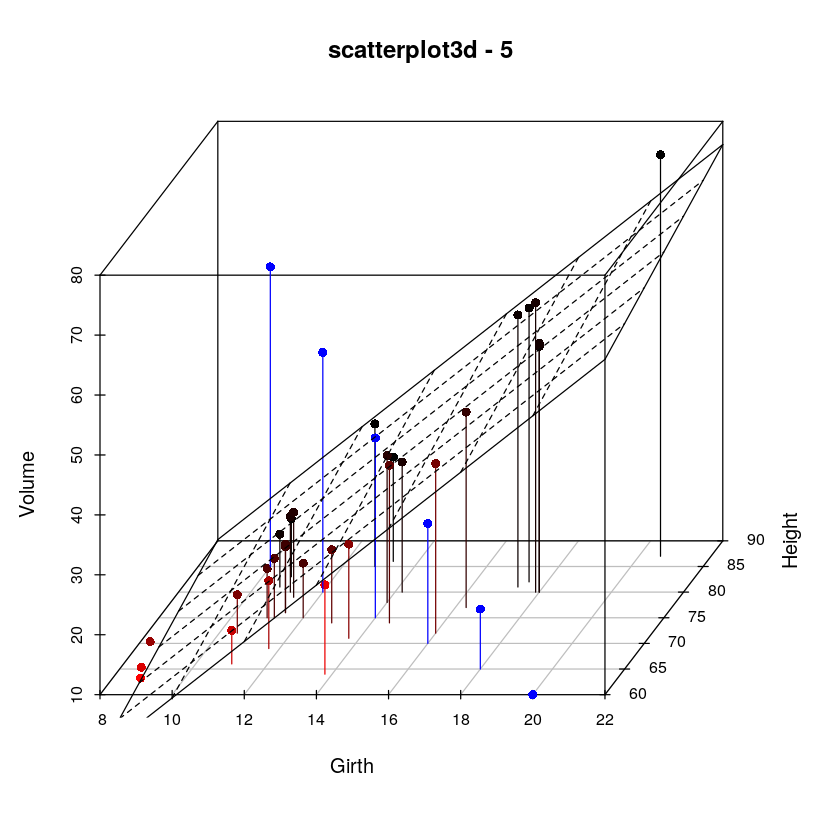

In [12]:
# example 5 from scatterplot3d.f

data(trees)
s3d <- scatterplot3d(trees, type="h", highlight.3d=TRUE,
                     angle=55, scale.y=0.7, pch=16, main="scatterplot3d - 5")

# Now adding some points to the "scatterplot3d"
s3d$points3d(seq(10,20,2), seq(85,60,-5), seq(60,10,-10),
             col="blue", type="h", pch=16)

# Now adding a regression plane to the "scatterplot3d"
attach(trees)
my.lm <- lm(Volume ~ Girth + Height)
s3d$plane3d(my.lm, lty.box = "solid")

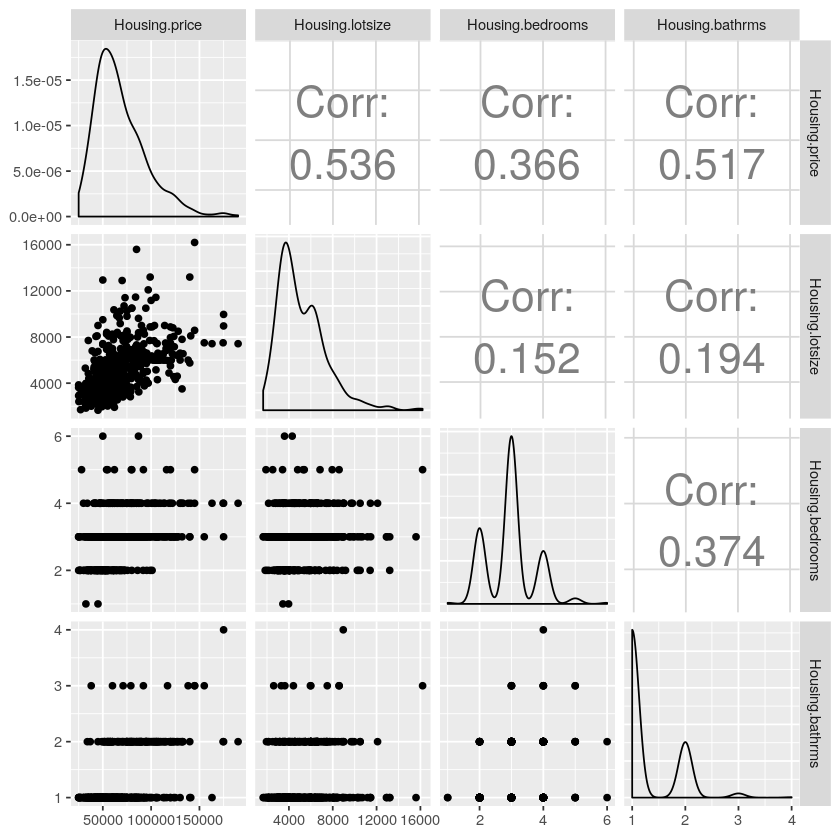

In [13]:
# correlation matrix
h1 <- data.frame(Housing$price, Housing$lotsize, Housing$bedrooms, Housing$bathrms)

ggpairs(h1, 
        upper = list(continuous = wrap("cor", size = 9))) 

In [15]:
# Anscombe's Quartet

anscombe  # view the Anscombe dataset 


x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71
9,9,9,8,8.81,8.77,7.11,8.84
11,11,11,8,8.33,9.26,7.81,8.47
14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,8,7.24,6.13,6.08,5.25
4,4,4,19,4.26,3.10,5.39,12.50
12,12,12,8,10.84,9.13,8.15,5.56
7,7,7,8,4.82,7.26,6.42,7.91


In [16]:
# run all four regression models

r1 <- lm(y1 ~ x1, data = anscombe)
summary(r1)

r2 <- lm(y2 ~ x2, data = anscombe)
summary(r2)

r3 <- lm(y3 ~ x3, data = anscombe)
summary(r3)

r4 <- lm(y4 ~ x4, data = anscombe)
summary(r4)


Call:
lm(formula = y1 ~ x1, data = anscombe)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.92127 -0.45577 -0.04136  0.70941  1.83882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0001     1.1247   2.667  0.02573 * 
x1            0.5001     0.1179   4.241  0.00217 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6665,	Adjusted R-squared:  0.6295 
F-statistic: 17.99 on 1 and 9 DF,  p-value: 0.00217



Call:
lm(formula = y2 ~ x2, data = anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9009 -0.7609  0.1291  0.9491  1.2691 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)    3.001      1.125   2.667  0.02576 * 
x2             0.500      0.118   4.239  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.237 on 9 degrees of freedom
Multiple R-squared:  0.6662,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002179



Call:
lm(formula = y3 ~ x3, data = anscombe)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1586 -0.6146 -0.2303  0.1540  3.2411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0025     1.1245   2.670  0.02562 * 
x3            0.4997     0.1179   4.239  0.00218 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6663,	Adjusted R-squared:  0.6292 
F-statistic: 17.97 on 1 and 9 DF,  p-value: 0.002176



Call:
lm(formula = y4 ~ x4, data = anscombe)

Residuals:
   Min     1Q Median     3Q    Max 
-1.751 -0.831  0.000  0.809  1.839 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   3.0017     1.1239   2.671  0.02559 * 
x4            0.4999     0.1178   4.243  0.00216 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.236 on 9 degrees of freedom
Multiple R-squared:  0.6667,	Adjusted R-squared:  0.6297 
F-statistic:    18 on 1 and 9 DF,  p-value: 0.002165


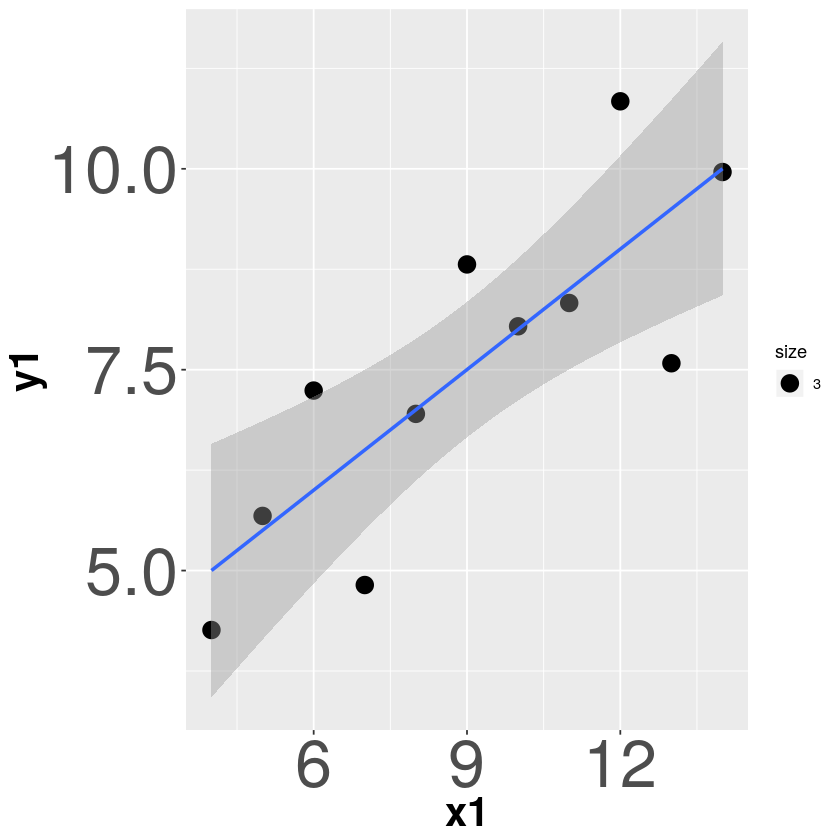

In [17]:
# plot all four Anscombe models 

ggplot(anscombe, aes(x=x1, y=y1)) + geom_point((aes(size=3))) +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=TRUE,    #  add shaded confidence region
              fullrange=TRUE)  + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
        axis.title=element_text(size=24,face="bold"))


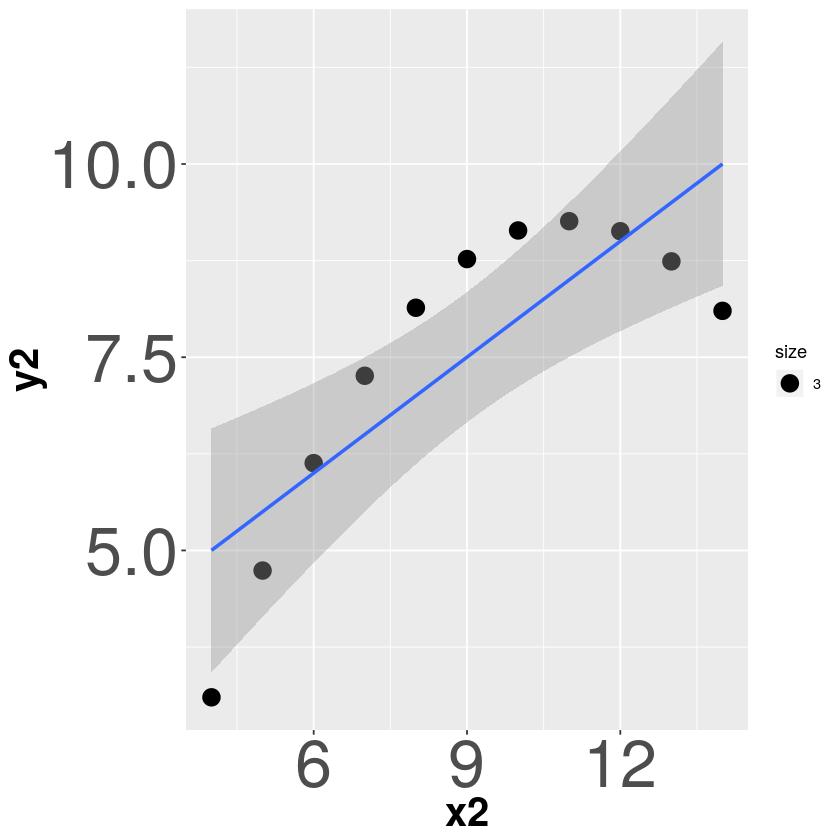

In [18]:
ggplot(anscombe, aes(x=x2, y=y2)) + geom_point((aes(size=3))) +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=TRUE,    #  add shaded confidence region
              fullrange=TRUE) + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
         axis.title=element_text(size=24,face="bold"))


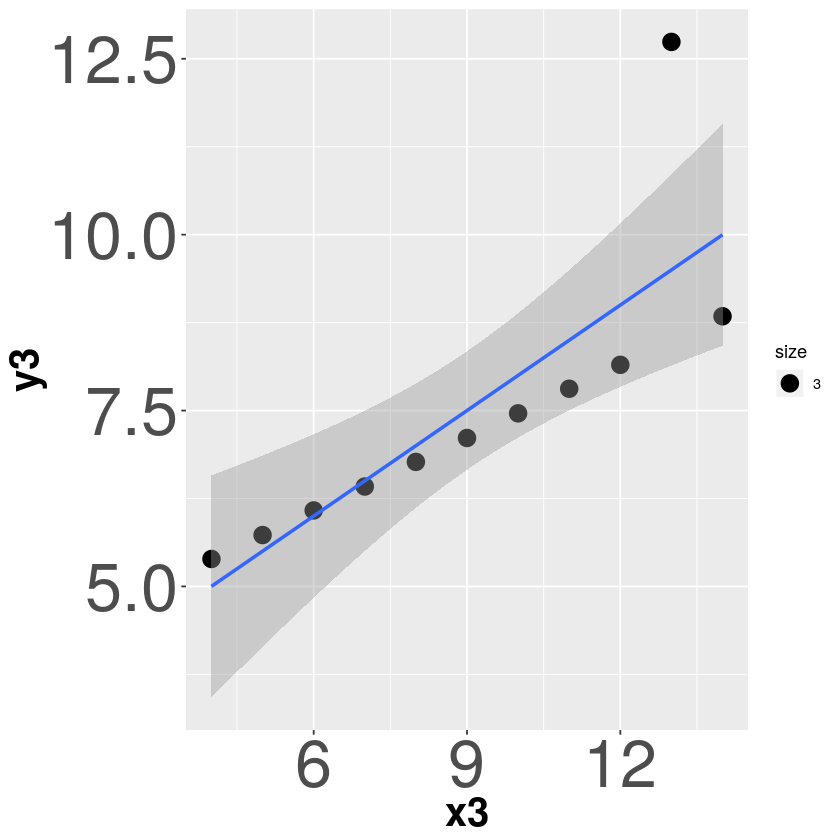

In [19]:
ggplot(anscombe, aes(x=x3, y=y3)) + geom_point((aes(size=3))) +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=TRUE,    #  add shaded confidence region
              fullrange=TRUE) + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
         axis.title=element_text(size=24,face="bold"))


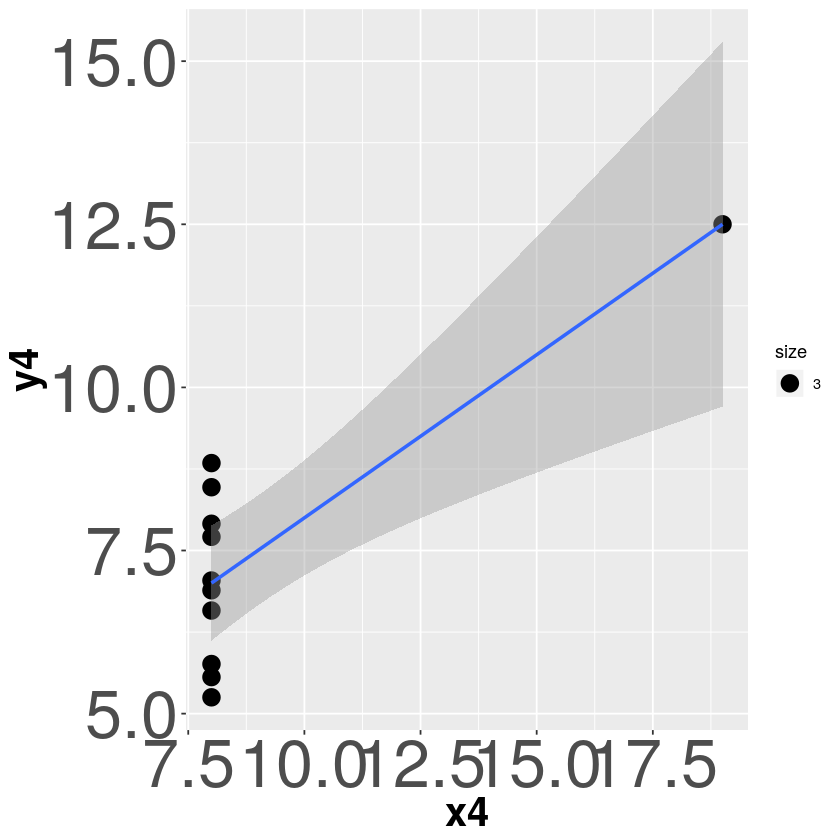

In [20]:
ggplot(anscombe, aes(x=x4, y=y4)) + geom_point(aes(size=3)) +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
  geom_smooth(method=lm,   # Add linear regression lines
              se=TRUE,    #  add shaded confidence region
              fullrange=TRUE) + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
         axis.title=element_text(size=24,face="bold"))


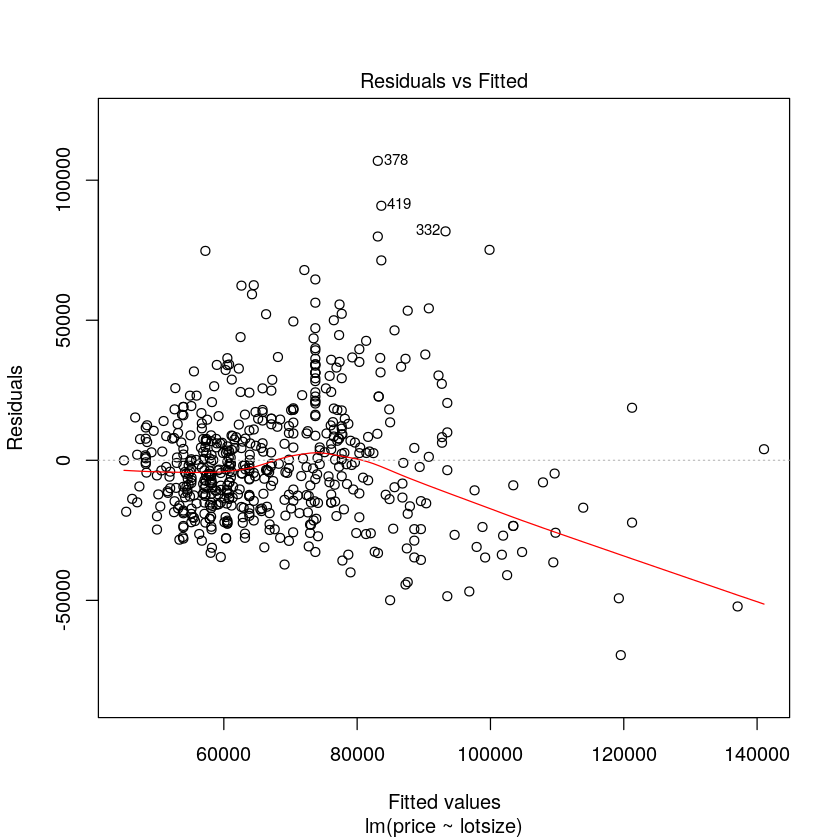

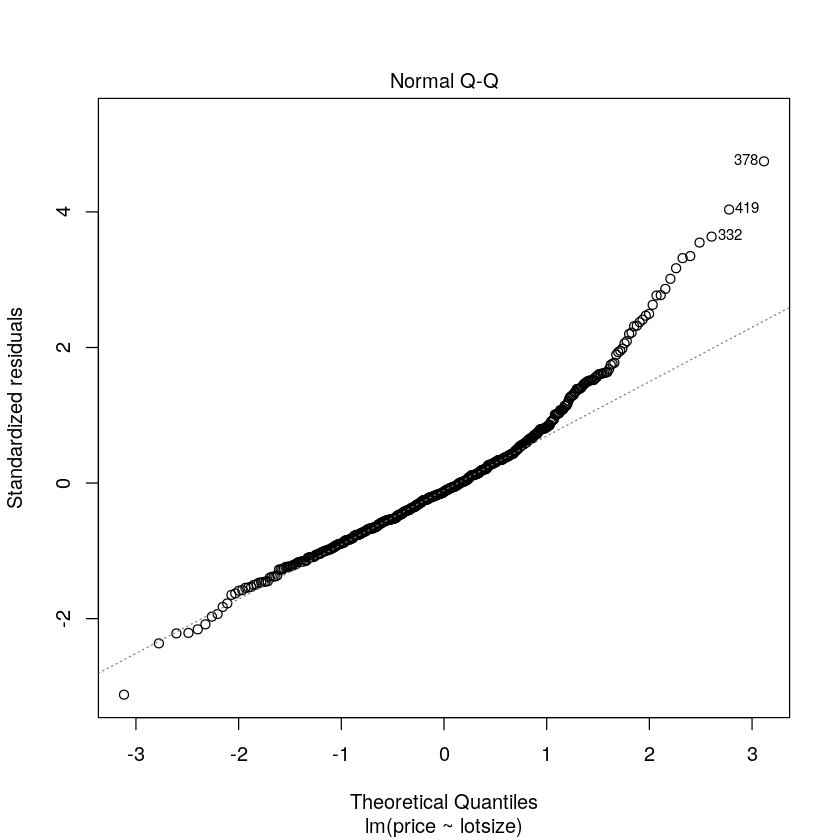

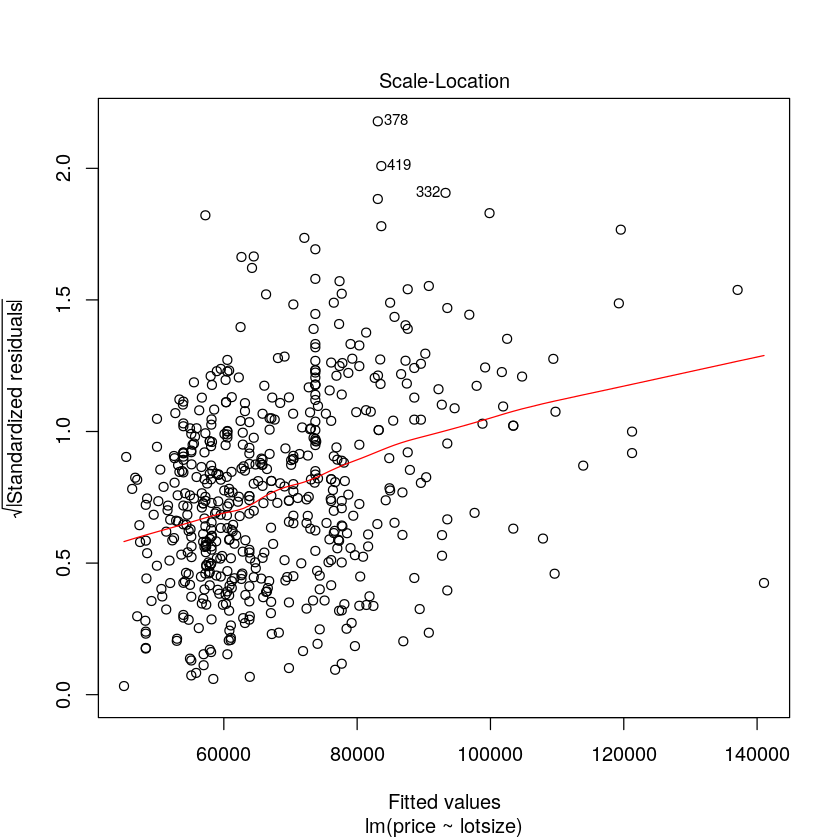

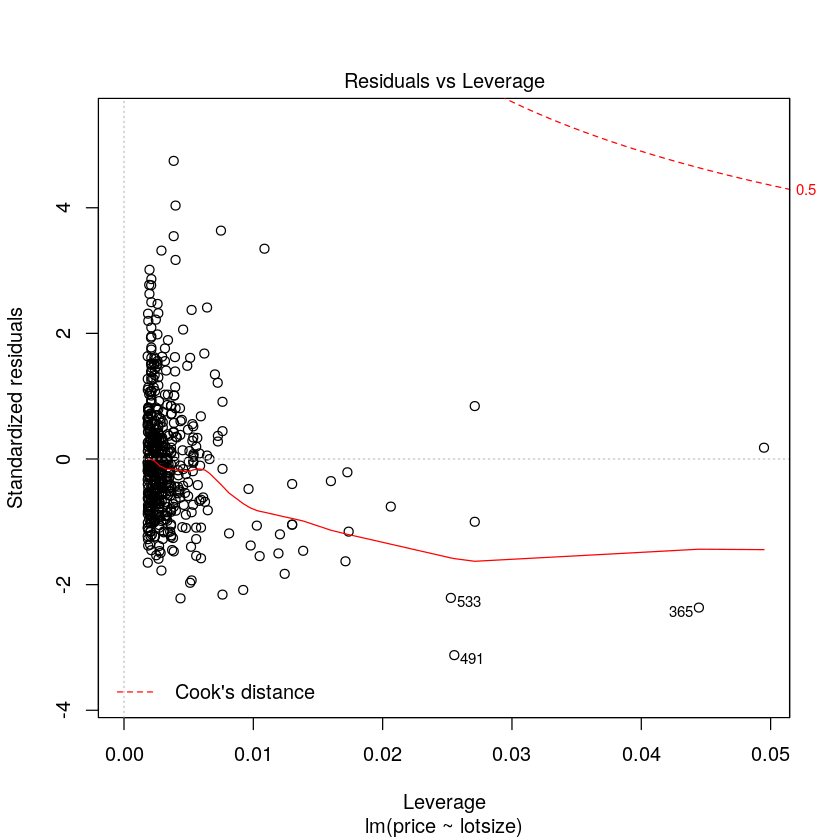

In [22]:
#
# plot the 4 diagnostics plots for a linear model of Price vs. lotsize 
#

a.lm <- lm(formula = price ~ lotsize , data = Housing)

plot.new()
plot(a.lm)



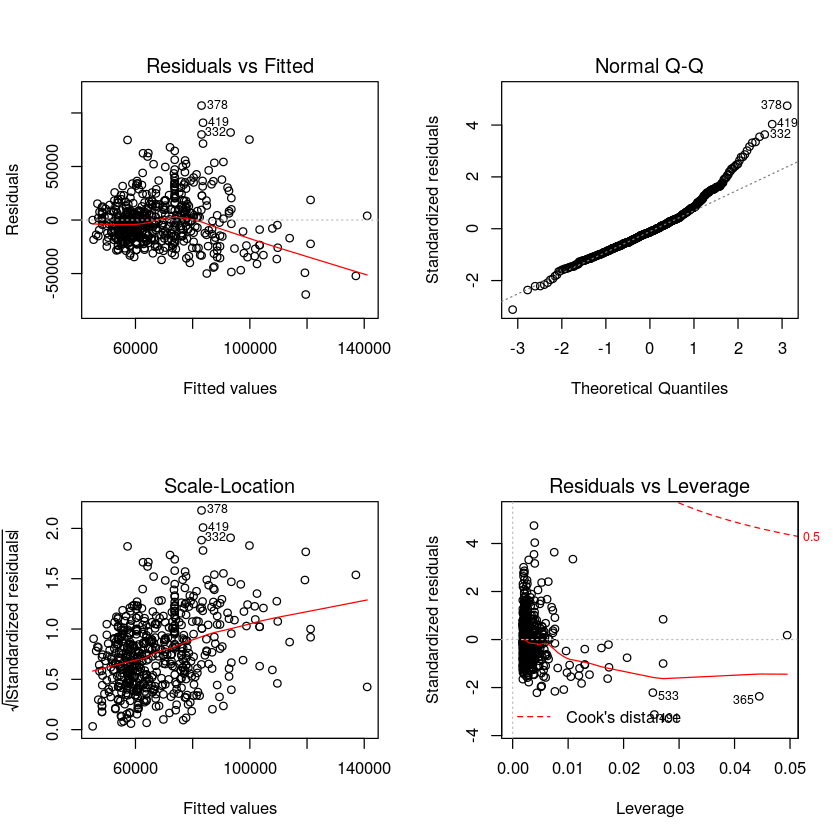

In [23]:
par(mfrow = c(2, 2))  # Split the plotting panel into a 2 x 2 grid
plot(a.lm)  # Plot # plots the four diagnostics plots


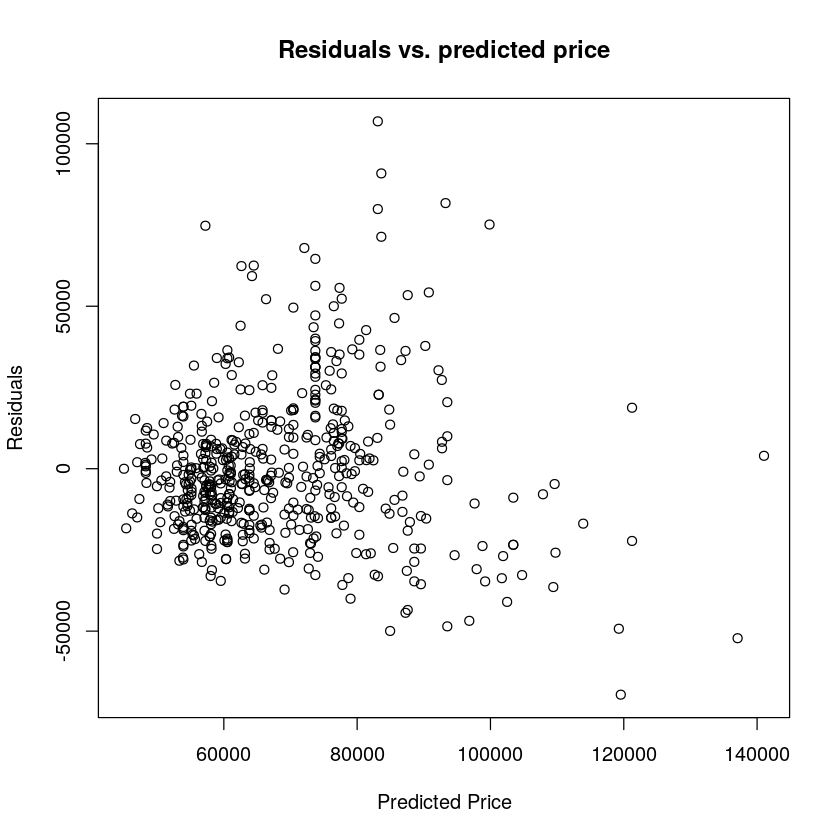

In [24]:
# plot residual against fitted (predicted) price
plot.new()
a.res <- resid(a.lm)
a.pred <- fitted(a.lm)

plot.new()

plot(a.pred, a.res, main = "Residuals vs. predicted price", 
     xlab = "Predicted Price", ylab = "Residuals")


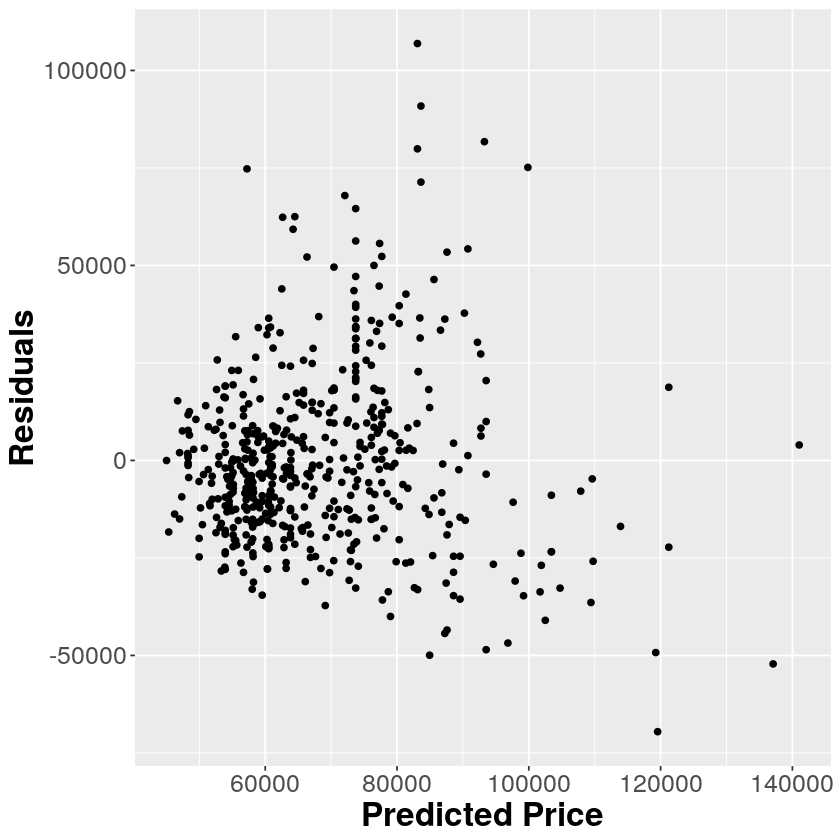

In [28]:
# ggplot residual against fitted (predicted) price

# I didn't want to mess around with the built-in dataset Housing. So copy it to a new dataframe df

df <-  Housing  %>% modelr::add_predictions(a.lm) %>% modelr::add_residuals(a.lm)


ggplot(df,aes(x=pred, y=resid)) + geom_point() + labs(x = "Predicted Price") + labs(y = "Residuals") +
  scale_colour_hue(l=50) + # Use a slightly darker palette than normal
    theme(axis.text.x = element_text(size=15), axis.text.y = element_text(size=15),
         axis.title=element_text(size=20,face="bold"))



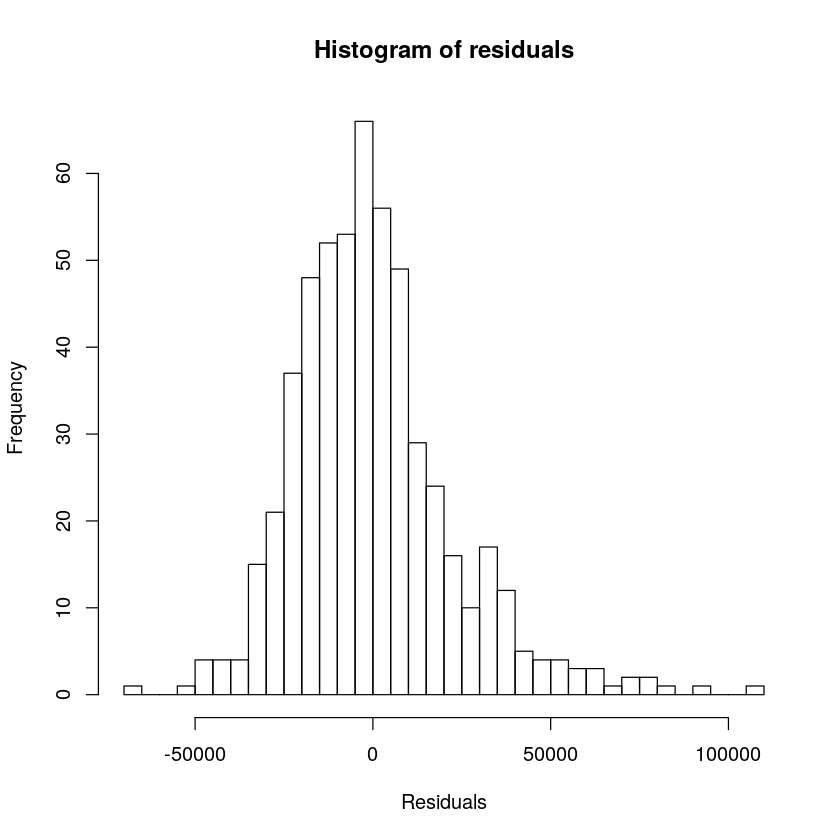

In [31]:
# histogram of residuals is useful 

hist(a.res, breaks="FD", xlab="Residuals", 
     main="Histogram of residuals")


In [32]:
#  Two Regression to illustrate multicollinearity

Reg1 <- lm(formula = mpg ~ cylinders, data = Auto)
summary(Reg1)
Reg2 <-  lm(formula = mpg ~ cylinders + displacement + weight, data = Auto)
summary(Reg2)



Call:
lm(formula = mpg ~ cylinders, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.2413  -3.1832  -0.6332   2.5491  17.9168 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  42.9155     0.8349   51.40   <2e-16 ***
cylinders    -3.5581     0.1457  -24.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.914 on 390 degrees of freedom
Multiple R-squared:  0.6047,	Adjusted R-squared:  0.6037 
F-statistic: 596.6 on 1 and 390 DF,  p-value: < 2.2e-16



Call:
lm(formula = mpg ~ cylinders + displacement + weight, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5568  -2.8703  -0.3649   2.2708  16.4338 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.3709616  1.4806851  29.967  < 2e-16 ***
cylinders    -0.2677968  0.4130673  -0.648    0.517    
displacement -0.0126740  0.0082501  -1.536    0.125    
weight       -0.0057079  0.0007139  -7.995  1.5e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.297 on 388 degrees of freedom
Multiple R-squared:  0.6993,	Adjusted R-squared:  0.697 
F-statistic: 300.8 on 3 and 388 DF,  p-value: < 2.2e-16


cylinders displacement       weight 
   10.515508    15.786455     7.788716

Auto.cylinders,Auto.displacement,Auto.weight
8,307,3504
8,350,3693
8,318,3436
8,304,3433
8,302,3449
8,429,4341
8,454,4354
8,440,4312
8,455,4425
8,390,3850


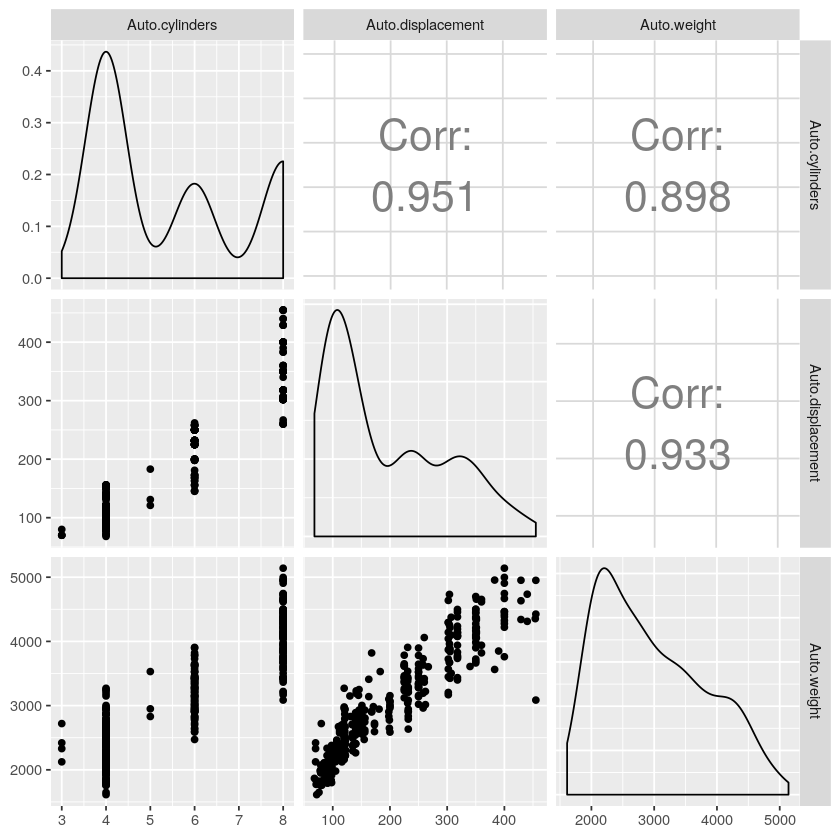

In [34]:
# print Variance Inflation factors
vif(Reg2)
#
h1 <- data.frame(Auto$cylinders, Auto$displacement, Auto$weight)
head(h1,10)

ggpairs(h1, 
        upper = list(continuous = wrap("cor", size = 9))) 

